# Machine Learning project to forecast customer churn

### Data analysis step

In [33]:
!pip install -q -U watermark

In [34]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Basic configs for default charts
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [6, 5]

In [36]:
%reload_ext watermark
%watermark -a "Vinicius Rubens"

Author: Vinicius Rubens



### Loading dataset

In [37]:
df = pd.read_csv('../data/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   MonthlyUsage          1000 non-null   int64  
 2   Plan                  1000 non-null   object 
 3   CustomerSatisfaction  1000 non-null   int64  
 4   ContractTime          1000 non-null   object 
 5   MonthlyValue          1000 non-null   float64
 6   Churn                 1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [38]:
df.head()

,Age,MonthlyUsage,Plan,CustomerSatisfaction,ContractTime,MonthlyValue,Churn
0,56,52,Premium,1,Short,75.48,0
1,69,65,Basic,4,Short,79.25,0
2,46,76,Standard,3,Long,183.56,0
3,32,42,Basic,2,Long,162.50,0
4,60,74,Standard,2,Long,186.23,1


### EDA

We defined the target variable (target of the study).

Churn variable:

- 1 --> Positive class (there was churn, i.e., the subscription was canceled)
- 0 --> Negative class (there was no churn, i.e., the subscription was not canceled)

In [39]:
def eda(data):
    for column in data.columns[:-1]:
        if data[column].dtype in ['int64', 'float64']:
            # Histogram and Boxplot
            fig, axes = plt.subplots(1, 2)
            sns.histplot(data[column], kde = True, ax = axes[0])
            sns.boxplot(x = 'Churn', y = column, data = data, ax = axes[1])
            axes[0].set_title(f'Distribution of {column}')
            axes[1].set_title(f'{column} vs Churn')
            plt.tight_layout()
            plt.show()
            
        else:
            # Frequency vs Churn
            fig, axes = plt.subplots(1, 2)
            sns.countplot(x = column, data = data, ax = axes[0])
            sns.countplot(x = column, hue = 'Churn', data = data, ax = axes[1])
            axes[0].set_title(f'Distribution of {column}')
            axes[1].set_title(f'{column} vs Churn')
            plt.tight_layout()
            plt.show()

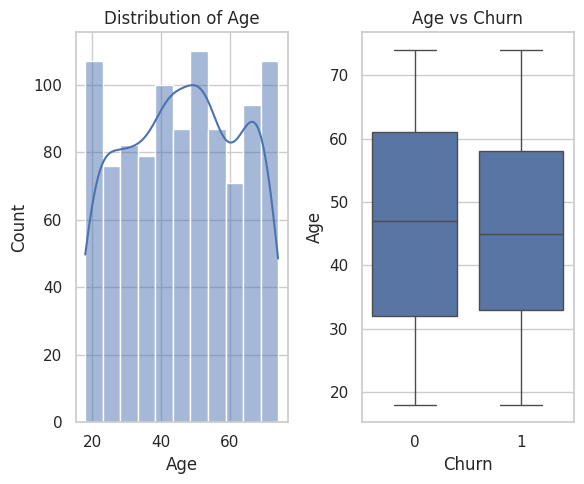

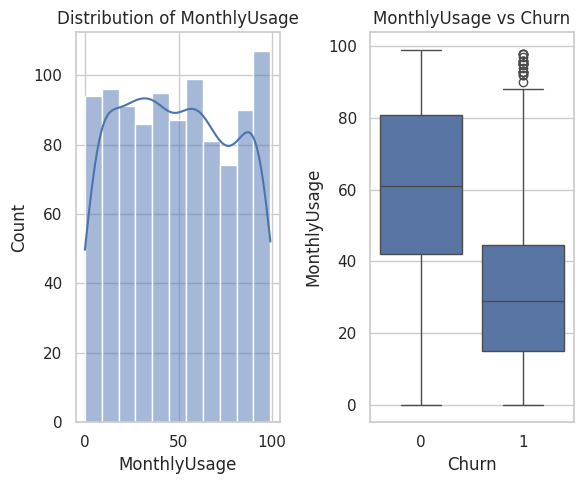

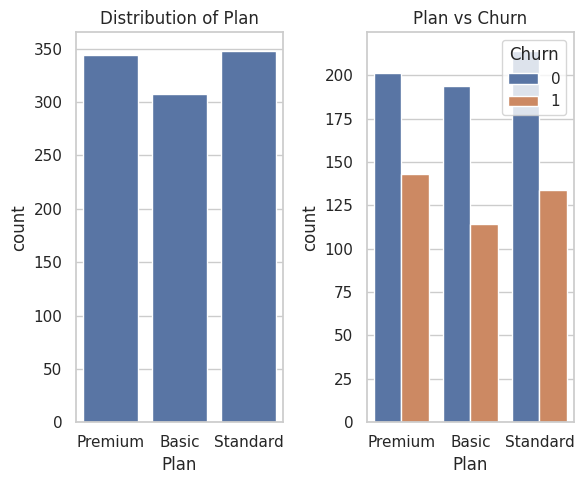

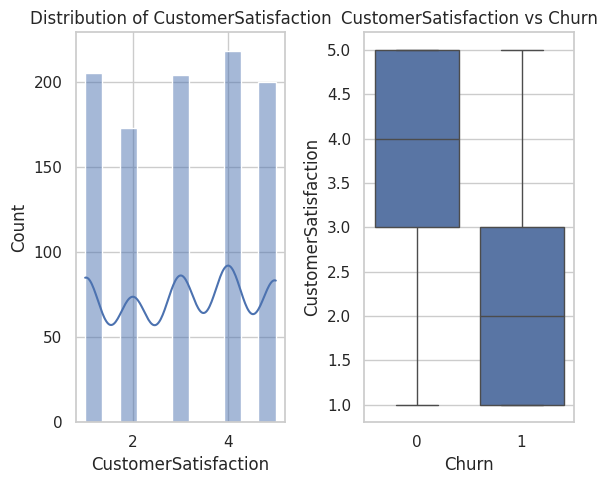

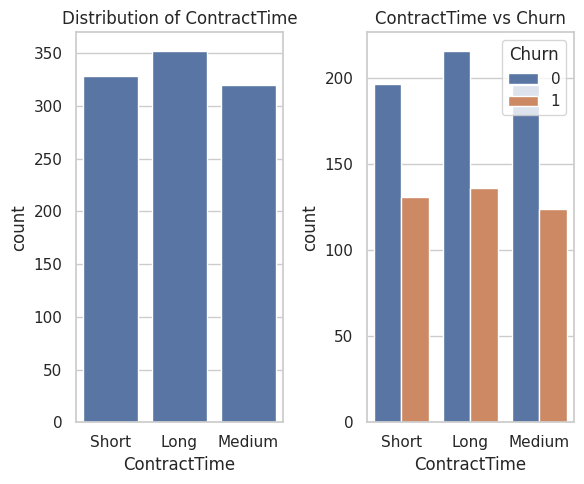

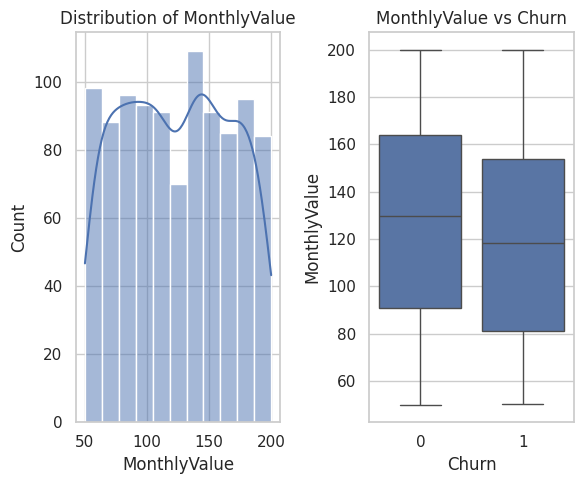

In [40]:
# We will use the auxiliary function to print charts for each column
eda(df)

About Age Column
* We examined the data for discrepancies, such as valleys or peaks. The histogram indicates that while certain ages appear more frequently than others, there are no significant anomalies.
* The boxplot reveals a slight difference in the median age of those who cancel their subscriptions, though it is not statistically significant. It simply suggests that younger individuals are slightly more prone to canceling.

About Monthly Usage Column
* The histogram does not show any discrepancies.
* The boxplot indicates that those who canceled the plan have a lower median usage; in other words, lower service consumption leads to cancellation. However, there are outliers where users with high usage still choose to cancel.

About Plan Column
* The histogram displays no discrepancies that would influence model training.
* The boxplot shows that the highest volume of subscription cancellations occurred within the Premium plan.

About Customer Satisfaction Column
* The histogram shows no discrepancies.
* The boxplot reveals a significantly lower median for those who canceled, indicating that customers who gave a low satisfaction score are more prone to cancellation.

About Contract Time Column
* The histogram shows no discrepancies in the analysis.
* Regarding the boxplot, customers with longer contracts appear more prone to canceling the plan, although the discrepancy is not substantial.

About Monthly Value Column
* The histogram shows no discrepancies.
* The boxplot indicates that cancellation is more likely among those who pay lower rates.

In [41]:
%watermark -a "Vinicius Rubens"

Author: Vinicius Rubens

